<a href="https://colab.research.google.com/github/sherlockwisdom/Image-Properties/blob/main/inference_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd

In [17]:
data = pd.read_csv('data.csv') 

print(data.keys())

Index(['original_width', 'original_height', 'original_entropy',
       'original_bytes', 'resized_width', 'resized_height', 'resized_entropy',
       'resized_bytes', 'resized_approx_sms', 'compressed_entropy',
       'compression_ratio', 'compressed_bytes', 'approx_sms',
       'per_resized_res_changed', 'per_resized_entropy_change',
       'per_compressed_entropy_change'],
      dtype='object')


In [18]:
# let's get all the available resolutions and see how they are affected differently

# build a {float, list}
resolutions = {}
resized_resolutions = {}

widths = data["original_width"]
heights = data["original_height"]

resized_widths = data["resized_width"]
resized_heights = data["resized_height"]

print("original:", len(widths), len(heights))
print("resized:", len(resized_widths), len(resized_heights))

for i in range(len(widths)):
  res = widths[i] * heights[i]
  if not res in resolutions:
    resolutions[res] = [];
  resolutions[res].append(i)

print(resolutions)

original: 461 461
resized: 461 461
{384400.0: [0], 699392.0: [1, 2, 3, 4], 812544.0: [5, 6, 7, 8], 677120.0: [9, 10, 11, 12, 392, 393, 394], 442368.0: [13, 14, 15, 16, 17], 435120.0: [18, 19, 20, 21, 22], 649440.0: [23, 24, 25], 11808768.0: [26, 27, 28, 347, 348, 349, 416, 417, 418], 68100.0: [29, 30, 31], 500000.0: [32, 33, 34], 787520.0: [35, 36, 37, 38, 39], 4915200.0: [40, 41, 42], 98884.0: [43, 44, 45], 1228800.0: [46, 47, 48, 66, 67, 68], 541696.0: [49, 50, 51, 52, 374, 375, 376], 539100.0: [53, 54, 55, 56], 24000000.0: [57, 58, 59], 1638400.0: [60, 61, 62, 109, 111, 112], 1517724.0: [63, 64, 65], 7990272.0: [69, 70, 71, 72, 73, 74, 75, 123, 124, 125, 126, 163, 164, 165, 175, 176, 177, 196, 197, 198, 268, 269, 270, 277, 278, 279, 308, 309, 310, 326], 12192768.0: [76, 77, 120, 121, 122, 166, 167, 168, 172, 173, 174, 187, 188, 189, 199, 200, 201, 271, 272, 273, 274, 275, 276, 280, 281, 282, 289, 290, 291, 304, 305, 306, 307, 334, 335, 336, 337, 338, 339, 340], 786432.0: [78, 79, 80

In [23]:
# extract the psychovisual values
per_resized_res_changed = data['per_resized_res_changed']
approx_sms = data['approx_sms']
compressed_ratio = data['compression_ratio']

RS = []
CR = []
CE = []
RE = []
OE = []
NO_SMS = []
R_NO_SMS = []

import math
for res in resolutions:
  indexes = resolutions[res]

  # find the index for the values which have the best psychovisuals
  # use per_resized_res_changed
  for i in indexes:
    try:
      res_change = float(per_resized_res_changed[i])
      res_change_diff = res - int(data['resized_width'][i] * data['resized_height'][i])
    except Exception:
      continue

    if math.isnan(res_change_diff) or math.isnan(res_change) or math.isnan(approx_sms[i]):
      continue

    if res_change > 60:
      continue

    # if res_change == 100 and compressed_ratio[i] == 0:
    #   print(f"# sms - {data['original_width'][i]}x{data['original_height'][i]} RS100 and CR0 - max:", approx_sms[i])

    # if int(res_change) == 33 and compressed_ratio[i] == 0:
    #   print(f"# sms - {data['original_width'][i]}x{data['original_height'][i]} RS33 and CR0 - min:", approx_sms[i])

    # print(f"# sms - {data['original_width'][i]}x{data['original_height'][i]} RS{res_change} and CR{compressed_ratio[i]} - var:", approx_sms[i])

    if approx_sms[i] > 50:
      continue


    if data['compressed_entropy'][i] > 100:
      continue

    # if int(res_change) != 33 and int(res_change) != 100 and compressed_ratio[i] != 0:
    if int(res_change) != 33 and int(res_change) != 100 and compressed_ratio[i] == 0:
      CE.append(data['compressed_entropy'][i])
      RE.append(data['resized_entropy'][i])
      OE.append(data['original_entropy'][i])
      RS.append(int(res_change))
      res_change_diff = int(res_change_diff)

      NO_SMS.append(int(approx_sms[i]))
      R_NO_SMS.append(int(data['resized_approx_sms'][i]))
      CR.append(int(compressed_ratio[i]))
    
    # CE.append(data['compressed_entropy'][i])
    # RS.append(int(res_change))
    # res_change_diff = int(res_change_diff)

    # # RS.append(res_change_diff)
    # NO_SMS.append(int(approx_sms[i]))
    # CR.append(int(compressed_ratio[i]))
  # print()

max_value = max(RS)
RS = [num / max_value * 100 for num in RS]

print("max - ", max_value)
print("RS:", RS)
print("CR:", CR)
print("CE:", CE)
print("RE:", RE)
print("OE:", OE)
print("NO_SMS:", NO_SMS)
print("R_NO_SMS:", R_NO_SMS)

max -  59
RS: [91.52542372881356, 93.22033898305084, 93.22033898305084, 81.35593220338984, 77.96610169491525, 83.05084745762711, 94.91525423728814, 88.13559322033898, 81.35593220338984, 100.0, 91.52542372881356, 94.91525423728814, 83.05084745762711, 86.4406779661017, 94.91525423728814, 79.66101694915254, 77.96610169491525, 79.66101694915254, 89.83050847457628, 84.7457627118644, 86.4406779661017, 91.52542372881356, 81.35593220338984, 88.13559322033898, 57.6271186440678, 93.22033898305084, 83.05084745762711, 88.13559322033898]
CR: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
CE: [7.71, 7.81, 7.39, 7.69, 7.63, 7.41, 7.67, 7.66, 7.6, 6.58, 7.3, 7.8, 7.68, 7.81, 7.74, 7.66, 7.49, 7.8, 6.77, 7.63, 7.26, 7.45, 7.07, 7.68, 7.55, 7.13, 7.64, 7.62]
RE: [7.98, 7.99, 7.98, 7.98, 7.98, 7.99, 7.98, 7.98, 7.98, 7.97, 7.98, 7.97, 7.99, 7.98, 7.99, 7.99, 7.94, 7.99, 7.98, 7.99, 7.97, 7.98, 7.97, 7.99, 7.97, 7.99, 7.99, 7.96]
OE: [7.98, 7.97, 7.98, 7.98, 7.97, 7.9

Coefficient: 0.21045732473962597


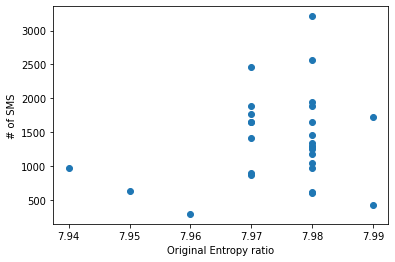

In [24]:
import matplotlib
import numpy as np


corr = np.corrcoef(R_NO_SMS, OE)
corr_coef = corr[0][1]
print("Coefficient:", corr_coef)

matplotlib.pyplot.scatter(OE, R_NO_SMS)
matplotlib.pyplot.xlabel("Original Entropy ratio")
matplotlib.pyplot.ylabel("# of SMS")

matplotlib.pyplot.show()

Coefficient: -0.11152496495629617


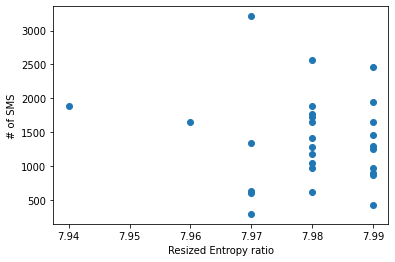

In [25]:
corr = np.corrcoef(R_NO_SMS, RE)
corr_coef = corr[0][1]
print("Coefficient:", corr_coef)

matplotlib.pyplot.scatter(RE, R_NO_SMS)
matplotlib.pyplot.xlabel("Resized Entropy ratio")
matplotlib.pyplot.ylabel("# of SMS")

matplotlib.pyplot.show()

Coefficient: 0.8691492159814568


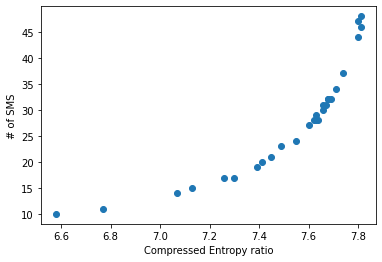

In [22]:
corr = np.corrcoef(NO_SMS, CE)
corr_coef = corr[0][1]
print("Coefficient:", corr_coef)

matplotlib.pyplot.scatter(CE, NO_SMS)
matplotlib.pyplot.xlabel("Compressed Entropy ratio")
matplotlib.pyplot.ylabel("# of SMS")

matplotlib.pyplot.show()